In [1]:
import string
import re

import pandas as pd

import nltk
from nltk.corpus import stopwords

import emoji

Download packages for NLTK

In [2]:
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /home/students/student11_5/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /home/students/student11_5/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /home/students/student11_5/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /home/students/student11_5/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /home/students/student11_5/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /home/student

True

Get English stopwords and emoji regex

In [3]:
en_stopwords = stopwords.words('english')
emoji_regex = emoji.get_emoji_regexp()

## Import data

There are around 30k duplicates

In [4]:
train = pd.read_csv('train.csv')
train = train.drop_duplicates(['review', 'rating'])
test = pd.read_csv('test.csv')

train

,review_id,review,rating
0,0,Ga disappointed neat products .. Meletot Hilsn...,1
1,1,"Rdtanya replace broken glass, broken chargernya",1
2,2,Nyesel bngt dsni shopping antecedent photo mes...,1
3,3,Sent a light blue suit goods ga want a refund,1
4,4,Pendants came with dents and scratches on its ...,1
...,...,...,...
146804,146804,Excellent quality Excellent quality Very acco...,5
146806,146806,Excellent product quality delivery speed is ve...,5
146807,146807,thanks gan,5
146808,146808,Awesome awesome quality merchandise value CP ...,5


## Clean data

In [5]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

- Punctuations that likely won't impact the sentiment `+*`
- Remove hashtag `#[a-z]+`
- Remove mention `@[a-z]+`
- Remove hyperlinks `http.+`

In [6]:
train['review_clean'] = train['review'].str.lower()

train['review_clean'] = train['review_clean'].str.replace(r'’', '\'')
train['review_clean'] = train['review_clean'].str.replace(r'#[a-z]+', ' ')
train['review_clean'] = train['review_clean'].str.replace(r'@[a-z]+', ' ')
train['review_clean'] = train['review_clean'].str.replace(r'[\+\*=@#<>\(\)\[\]\^_]+', ' ')
train['review_clean'] = train['review_clean'].str.replace(r'[,!?;.:]+', '. ')

# Remove some repeated words
train['review_clean'] = train['review_clean'].str.replace(r'(other ){2,}', 'other ')
train['review_clean'] = train['review_clean'].str.replace(r'(kg ){2,}', 'kg ')
train['review_clean'] = train['review_clean'].str.replace(r'(mm ){2,}', 'mm ')
train['review_clean'] = train['review_clean'].str.replace(r'(amount of ){2,}', 'amount of ')
train['review_clean'] = train['review_clean'].str.replace(r'(good ){2,}', 'good ')
train['review_clean'] = train['review_clean'].str.replace(r'(great ){2,}', 'great ')

train

,review_id,review,rating,review_clean
0,0,Ga disappointed neat products .. Meletot Hilsn...,1,ga disappointed neat products . meletot hilsn...
1,1,"Rdtanya replace broken glass, broken chargernya",1,rdtanya replace broken glass. broken chargernya
2,2,Nyesel bngt dsni shopping antecedent photo mes...,1,nyesel bngt dsni shopping antecedent photo mes...
3,3,Sent a light blue suit goods ga want a refund,1,sent a light blue suit goods ga want a refund
4,4,Pendants came with dents and scratches on its ...,1,pendants came with dents and scratches on its ...
...,...,...,...,...
146804,146804,Excellent quality Excellent quality Very acco...,5,excellent quality excellent quality very acco...
146806,146806,Excellent product quality delivery speed is ve...,5,excellent product quality delivery speed is ve...
146807,146807,thanks gan,5,thanks gan
146808,146808,Awesome awesome quality merchandise value CP ...,5,awesome awesome quality merchandise value cp ...


View a few stopwords

In [7]:
en_stopwords[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [8]:
def remove_stopwords(sentence):
    tokens = sentence.split()
    tokens = [token for token in tokens if token not in en_stopwords]
    return " ".join(tokens)

train['review_clean'] = train['review_clean'].apply(remove_stopwords)
train

,review_id,review,rating,review_clean
0,0,Ga disappointed neat products .. Meletot Hilsn...,1,ga disappointed neat products . meletot hilsny...
1,1,"Rdtanya replace broken glass, broken chargernya",1,rdtanya replace broken glass. broken chargernya
2,2,Nyesel bngt dsni shopping antecedent photo mes...,1,nyesel bngt dsni shopping antecedent photo mes...
3,3,Sent a light blue suit goods ga want a refund,1,sent light blue suit goods ga want refund
4,4,Pendants came with dents and scratches on its ...,1,pendants came dents scratches surface. coating...
...,...,...,...,...
146804,146804,Excellent quality Excellent quality Very acco...,5,excellent quality excellent quality accommodat...
146806,146806,Excellent product quality delivery speed is ve...,5,excellent product quality delivery speed good ...
146807,146807,thanks gan,5,thanks gan
146808,146808,Awesome awesome quality merchandise value CP ...,5,awesome awesome quality merchandise value cp n...


Remove all rows that have nothing left (after removing stopwords)

In [9]:
train = train[train['review_clean'].astype(bool)]
train

,review_id,review,rating,review_clean
0,0,Ga disappointed neat products .. Meletot Hilsn...,1,ga disappointed neat products . meletot hilsny...
1,1,"Rdtanya replace broken glass, broken chargernya",1,rdtanya replace broken glass. broken chargernya
2,2,Nyesel bngt dsni shopping antecedent photo mes...,1,nyesel bngt dsni shopping antecedent photo mes...
3,3,Sent a light blue suit goods ga want a refund,1,sent light blue suit goods ga want refund
4,4,Pendants came with dents and scratches on its ...,1,pendants came dents scratches surface. coating...
...,...,...,...,...
146804,146804,Excellent quality Excellent quality Very acco...,5,excellent quality excellent quality accommodat...
146806,146806,Excellent product quality delivery speed is ve...,5,excellent product quality delivery speed good ...
146807,146807,thanks gan,5,thanks gan
146808,146808,Awesome awesome quality merchandise value CP ...,5,awesome awesome quality merchandise value cp n...


Strategy to clean emojis:
- Remove all emojis, only keep the first two
- Convert the first two emojis into text

In [10]:
def clean_emoji(sentence):
    def convert_emoji(char): return emoji.demojize(char).replace(':', ' ')

    emojis = list(re.finditer(emoji_regex, sentence))
    
    if len(emojis) == 0:
        return sentence
    
    elif len(emojis) == 1:
        first = emojis[0]
        start1 = first.start(0)
        end1 = first.end(0)
        sentence = sentence[:start1] + convert_emoji(first.group(0)) + sentence[end1:]

        return sentence
        
    first, second = emojis[:2]

    start1 = first.start(0)
    end1 = first.end(0)
    start2 = second.start(0)
    end2 = second.end(0)

    sentence = sentence[:start1] + convert_emoji(first.group(0)) + sentence[end1:start2] + convert_emoji(second.group(0)) + sentence[end2:]
    
    sentence = re.sub(emoji_regex, " ", sentence)
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

sample = '☁😊☁☁😊☁😁☁ ☁😊☁☁😊☁☁☁ ☁😊😊😊😊☁😊☁ ☁😊☁☁😊☁😊☁ ☁😊☁☁😊☁😊☁ ☁'
clean_emoji(sample)

' cloud smiling_face_with_smiling_eyes '

In [11]:
train['review_clean'] = train['review_clean'].apply(clean_emoji)
train['review_clean'] = train['review_clean'].str.replace(r'\s+', ' ')
train

,review_id,review,rating,review_clean
0,0,Ga disappointed neat products .. Meletot Hilsn...,1,ga disappointed neat products . meletot hilsny...
1,1,"Rdtanya replace broken glass, broken chargernya",1,rdtanya replace broken glass. broken chargernya
2,2,Nyesel bngt dsni shopping antecedent photo mes...,1,nyesel bngt dsni shopping antecedent photo mes...
3,3,Sent a light blue suit goods ga want a refund,1,sent light blue suit goods ga want refund
4,4,Pendants came with dents and scratches on its ...,1,pendants came dents scratches surface. coating...
...,...,...,...,...
146804,146804,Excellent quality Excellent quality Very acco...,5,excellent quality excellent quality accommodat...
146806,146806,Excellent product quality delivery speed is ve...,5,excellent product quality delivery speed good ...
146807,146807,thanks gan,5,thanks gan
146808,146808,Awesome awesome quality merchandise value CP ...,5,awesome awesome quality merchandise value cp n...


Check number of words after cleaning

In [12]:
train['count'] = train['review_clean'].str.split().str.len()
train.sort_values('count', ascending=False)

,review_id,review,rating,review_clean,count
54868,54868,Get me a very good ❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤...,3,get good red_heart ️ red_heart ️ ️ ️ ️ ️ ️ ️ ️...,188
123999,123999,makasii yy ♥ ️ ♥ ️ ♥ ️ ♥ ️ ♥ ️ ♥ ️ ♥ ️ ♥ ️ ♥ ️...,5,makasii yy heart_suit ️ heart_suit ️ ️ ️ ️ ️ ️...,180
115488,115488,Quality products Farren delivered straight Exc...,5,quality products farren delivered straight exc...,127
129197,129197,"Fast forward to this sensitivity, plus alcohol...",5,fast forward sensitivity. plus alcohol gel was...,125
118478,118478,"XgghHffuzigaxjaivwjpcwohxwj2, dưkfwxlhwcjwvljw...",5,xgghhffuzigaxjaivwjpcwohxwj2. dưkfwxlhwcjwvljw...,124
...,...,...,...,...,...
19817,19817,Very satisfy,2,satisfy,1
117042,117042,very puass,5,puass,1
132278,132278,Very responsive!,5,responsive.,1
142899,142899,very great,5,great,1


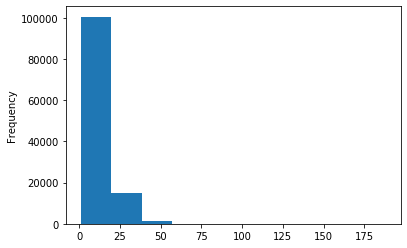

In [13]:
train['count'].plot.hist()

In [14]:
sum(train['count'] > 50)

246

Check class distribution

In [15]:
train.groupby('rating').count()

,review_id,review,review_clean,count
rating,,,,
1,13803,13803,13803,13803
2,11260,11260,11260,11260
3,28478,28478,28478,28478
4,31931,31931,31931,31931
5,31406,31406,31406,31406


Sample the validation set

In [16]:
NUM_VAL = 1000

val = pd.DataFrame(columns=train.columns)
ratings = train['rating'].unique()

for rating in ratings:
    sub_df = train[train['rating'] == rating]
    sub_df = sub_df.sample(NUM_VAL, random_state=0)
    val = val.append(sub_df, ignore_index=True)

train = train[~train['review_id'].isin(val['review_id'])]

In [17]:
val.groupby('rating').count()

,review_id,review,review_clean,count
rating,,,,
1,1000,1000,1000,1000
2,1000,1000,1000,1000
3,1000,1000,1000,1000
4,1000,1000,1000,1000
5,1000,1000,1000,1000


In [18]:
train.groupby('rating').count()

,review_id,review,review_clean,count
rating,,,,
1,12803,12803,12803,12803
2,10260,10260,10260,10260
3,27478,27478,27478,27478
4,30931,30931,30931,30931
5,30406,30406,30406,30406


Repeat the cleaning steps for test set

In [19]:
test['review_clean'] = test['review'].str.lower()

test['review_clean'] = test['review_clean'].str.replace(r'’', '\'')
test['review_clean'] = test['review_clean'].str.replace(r'#[a-z]+', ' ')
test['review_clean'] = test['review_clean'].str.replace(r'@[a-z]+', ' ')
test['review_clean'] = test['review_clean'].str.replace(r'[\+\*=@#<>\(\)\[\]\^_]+', ' ')
test['review_clean'] = test['review_clean'].str.replace(r'[,!?;.:]+', '. ')

test['review_clean'] = test['review_clean'].str.replace(r'(other ){2,}', 'other ')
test['review_clean'] = test['review_clean'].str.replace(r'(kg ){2,}', 'kg ')
test['review_clean'] = test['review_clean'].str.replace(r'(mm ){2,}', 'mm ')
test['review_clean'] = test['review_clean'].str.replace(r'(amount of ){2,}', 'amount of ')
test['review_clean'] = test['review_clean'].str.replace(r'(good ){2,}', 'good ')
test['review_clean'] = test['review_clean'].str.replace(r'(great ){2,}', 'great ')

test['review_clean'] = test['review_clean'].apply(remove_stopwords)

test['review_clean'] = test['review_clean'].apply(clean_emoji)
test['review_clean'] = test['review_clean'].str.replace(r'\s+', ' ')
test

,review_id,review,review_clean
0,1,"Great danger, cool, motif and cantik2 jg model...",great danger. cool. motif cantik2 jg models. d...
1,2,One of the shades don't fit well,one shades fit well
2,3,Very comfortable,comfortable
3,4,Fast delivery. Product expiry is on Dec 2022. ...,fast delivery. product expiry dec 2022. produc...
4,5,it's sooooo cute! i like playing with the glit...,sooooo cute. like playing glitters better brow...
...,...,...,...
60422,60423,Product has been succesfully ordered and shipp...,product succesfully ordered shipped quickly. g...
60423,60424,Opening time a little scared. Fear dalemnya de...,opening time little scared. fear dalemnya dest...
60424,60425,The product quality is excellent. The origina...,product quality excellent. original product. p...
60425,60426,They 're holding up REALLY well also .,'re holding really well also .


Check if any samples from test set was empty after cleaning

In [20]:
test[~test['review_clean'].astype(bool)]

,review_id,review,review_clean
26663,26664,Very very very very very very very very very v...,


Replace that sample with 'very'

In [21]:
test['review_clean'] = test['review_clean'].apply(lambda x: x if x != '' else 'very')

In [22]:
test[~test['review_clean'].astype(bool)]

,review_id,review,review_clean


In [23]:
train.to_csv('train_clean.csv', index=False)
val.to_csv('val_clean.csv', index=False)
test.to_csv('test_clean.csv', index=False)